In [1]:
#load some data
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston

boston = load_boston()
X_boston = boston.data
features_boston = boston.feature_names
y_boston = boston.target

from skate.model import DeployedModel
from skate.core.explanations import Interpretation
from skate.model import InMemoryModel

def input_formatter(data):
    return {'input':data.tolist()}
    
def output_formatter(response, key='predictions'):
    print
    return np.array(response.json()[key])

uri = 'http://datsci.dev:5000/predict'

dep_model = DeployedModel(uri, 
                         input_formatter,
                         output_formatter,
                         class_names=['Housing Prices'], 
                         examples=X_boston[:1000])


interpreter_boston = Interpretation()
interpreter_boston.load_data(X_boston[:1000], feature_names=features_boston)
# pdp = interpreter_boston.partial_dependence.plot_partial_dependence([('LSTAT','RM')], dep_model, with_variance=True, 
#    sampling_strategy='random-choice', n_jobs=4, grid_resolution=10, n_samples = 500, sample=True)
# plt.rcParams['figure.figsize'] = (16, 10)
# %matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


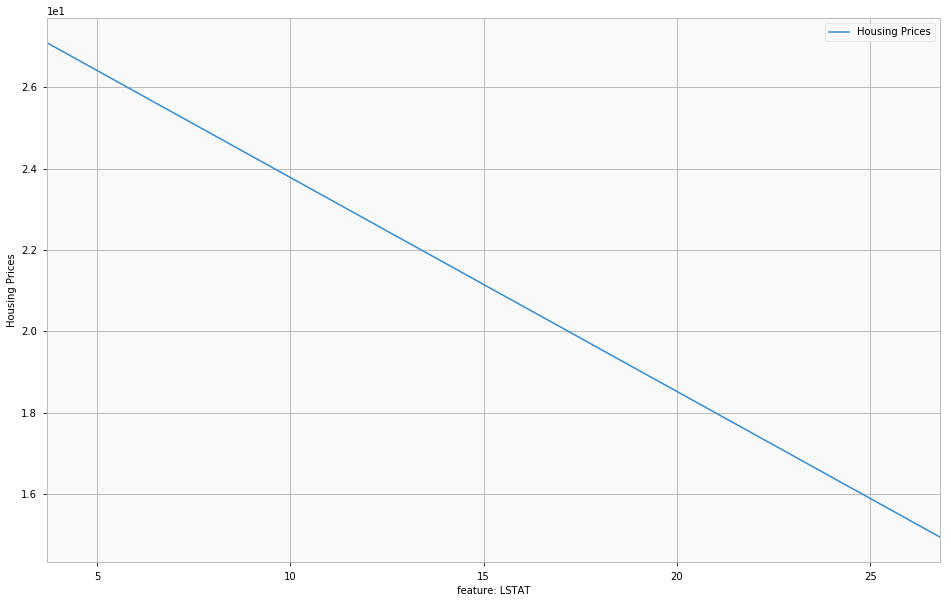

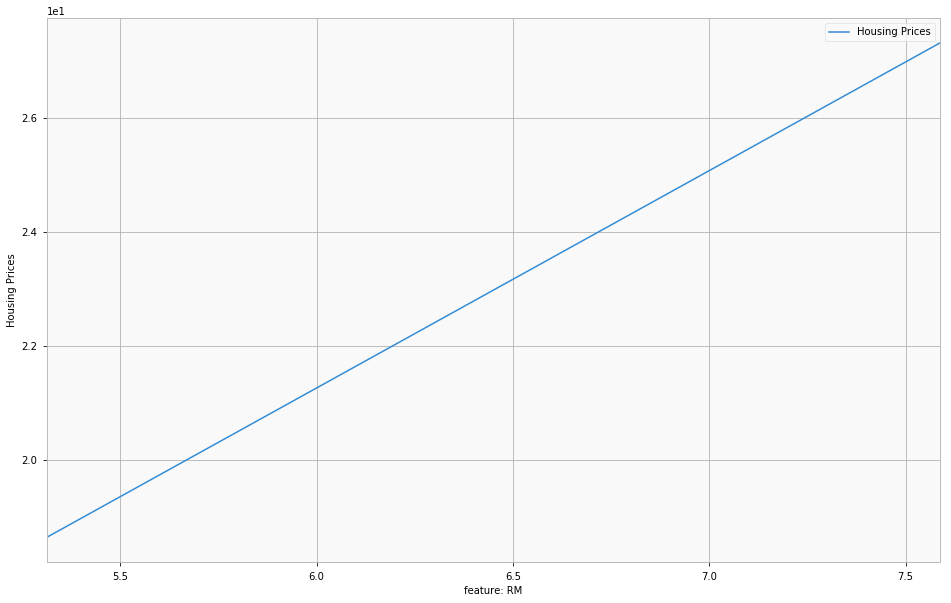

In [5]:
%matplotlib inline
pdp = interpreter_boston.partial_dependence.plot_partial_dependence(['LSTAT','RM'], dep_model,
   sampling_strategy='random-choice', n_jobs=4, grid_resolution=10, n_samples = 500, sample=True)

In [12]:
isinstance?